# **Scatter Plots with Categorical Coloring: Diamond Dataset**

## This notebook builds scatter plots where the color of each point represents a categorical variable:
## (e.g., `colour`, `clarity`, or `certification`).

This technique adds a **third dimension** to a 2D scatter plot and is recommended in the EDA lecture (Slide 43) and Doc2.docx ("Another 'dimension'... color, shape, size").

Dataset: Diamond.csv (Chu, 2001) — 308 observations, 5 variables

## **1. Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **2. Load and Inspect the Dataset**

In [2]:
df = pd.read_csv("Diamond.csv")
print("Dataset shape:", df.shape)
df.head()

# Interpretation:
# The dataset contains 308 diamond records with 5 variables:
# - Numerical: `carat` (weight), `price`
# - Categorical: `colour` (D–I), `clarity` (IF, VVS1, ..., VS2), `certification` (GIA, IGI, HRD)
# We will use the two numerical variables for the x/y axes and color points by one of the categorical variables.

Dataset shape: (308, 5)


,carat,colour,clarity,certification,price
0,0.30,D,VS2,GIA,1302
1,0.30,E,VS1,GIA,1510
2,0.30,G,VVS1,GIA,1510
3,0.30,G,VS1,GIA,1260
4,0.31,D,VS1,GIA,1641


## **3. Basic Scatter Plot: carat vs. price (no color)**

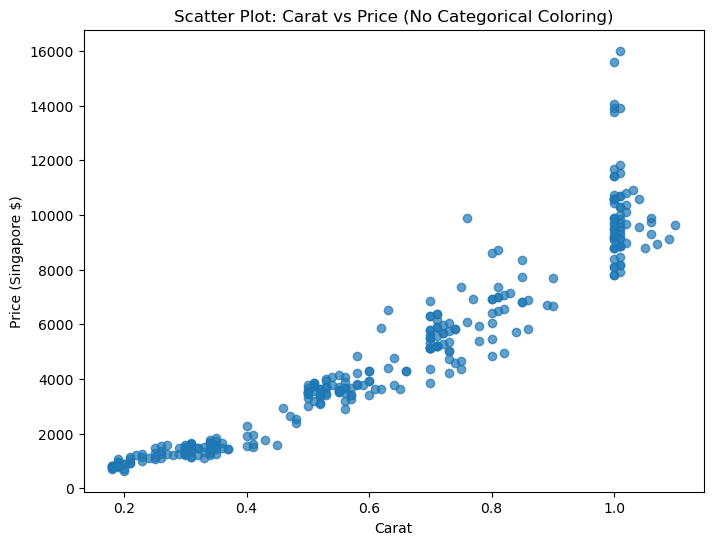

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(df['carat'], df['price'], alpha=0.7)
plt.title('Scatter Plot: Carat vs Price (No Categorical Coloring)')
plt.xlabel('Carat')
plt.ylabel('Price (Singapore $)')
plt.show()

# Interpretation:
# This baseline plot shows a strong positive relationship: as carat increases, price generally increases.
# However, it hides potentially important subgroup patterns (e.g., do GIA-certified diamonds cost more?).

## **4. Scatter Plot Colored by `certification`**

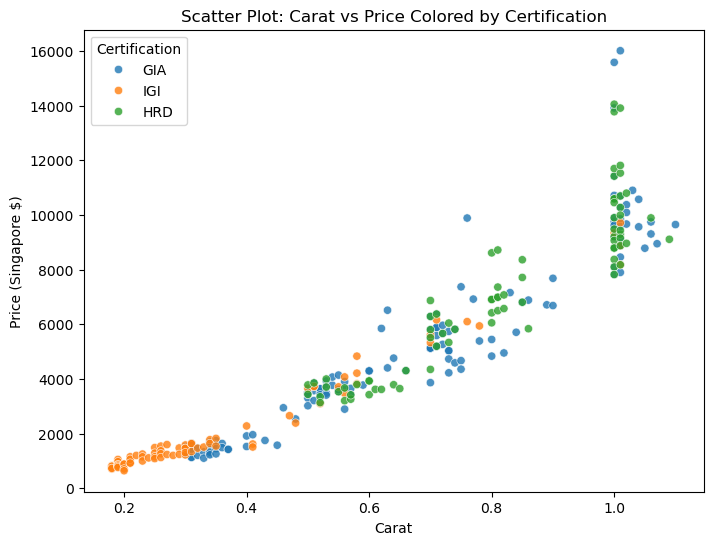

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='carat',
    y='price',
    hue='certification',  # Color by certification body
    alpha=0.8
)
plt.title('Scatter Plot: Carat vs Price Colored by Certification')
plt.xlabel('Carat')
plt.ylabel('Price (Singapore $)')
plt.legend(title='Certification')
plt.show()

# Interpretation:
# Coloring by `certification` reveals whether different labs (GIA, IGI, HRD) affect pricing.
# - GIA diamonds dominate and span the full range.
# - IGI diamonds are mostly in the lower-carat, lower-price region.
# - HRD diamonds appear in mid-to-high carat ranges.
# This suggests certification body may be a proxy for market segment or geographic region.

## **5. Scatter Plot Colored by `colour`**

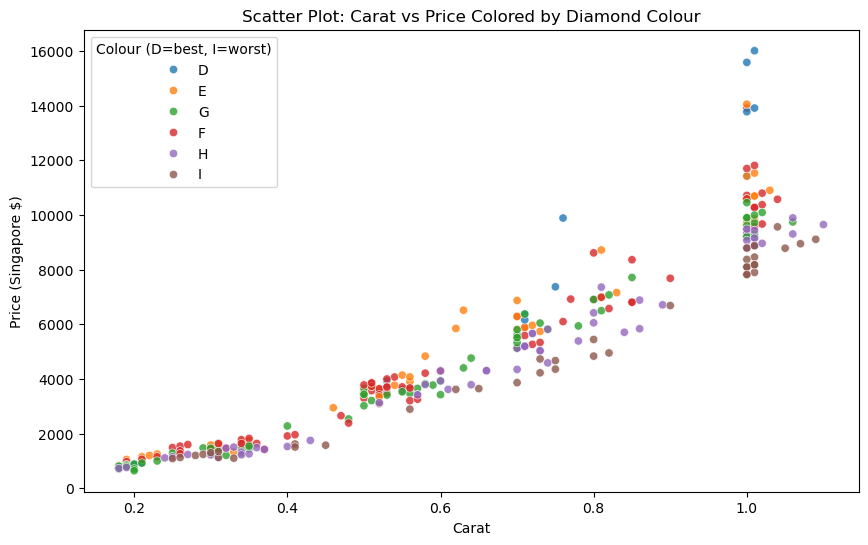

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='carat',
    y='price',
    hue='colour',
    palette='tab10',  # Use distinct colors for 6+ categories
    alpha=0.8
)
plt.title('Scatter Plot: Carat vs Price Colored by Diamond Colour')
plt.xlabel('Carat')
plt.ylabel('Price (Singapore $)')
plt.legend(title='Colour (D=best, I=worst)')
plt.show()

# Interpretation:
# Diamond colour grades from D (best/whitest) to I (more tinted). 
# - For a given carat size, D/E/F diamonds tend to be priced higher than G/H/I.
# - The separation is clearer in the 0.5–1.0 carat range.
# This visual confirms that colour is a key pricing factor and justifies its inclusion in models.


## **6. Scatter Plot Colored by `clarity`**

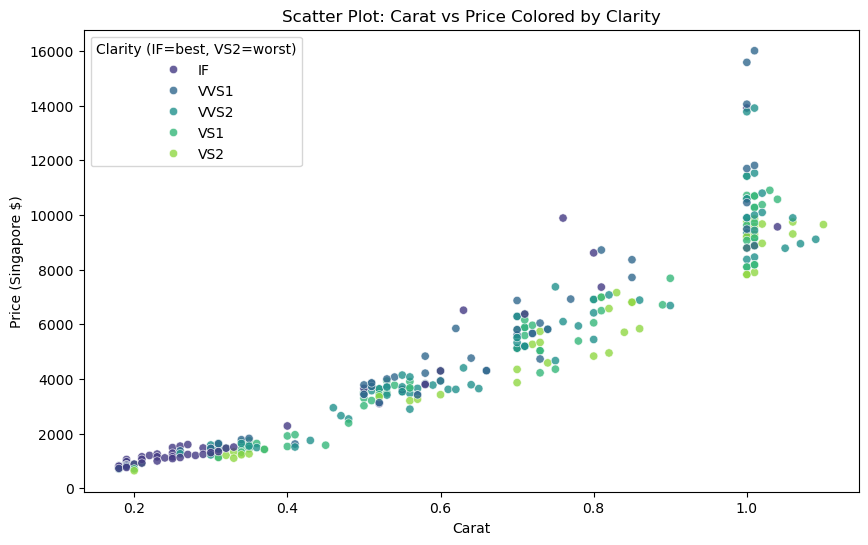

In [6]:
# Order clarity from best to worst for logical color progression
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2']
df['clarity'] = pd.Categorical(df['clarity'], categories=clarity_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='carat',
    y='price',
    hue='clarity',
    palette='viridis',  # Sequential palette for ordinal data
    alpha=0.8
)
plt.title('Scatter Plot: Carat vs Price Colored by Clarity')
plt.xlabel('Carat')
plt.ylabel('Price (Singapore $)')
plt.legend(title='Clarity (IF=best, VS2=worst)')
plt.show()

# Interpretation:
# Clarity is ordinal: IF (Internally Flawless) is best, VS2 is worst in this dataset.
# - Higher clarity (IF, VVS) diamonds command higher prices at the same carat weight.
# - The effect is strongest for larger diamonds (>0.7 carat).
# Using a sequential color palette (dark to light or vice versa) reflects the ordered nature of the variable.

## **7. Faceted Scatter Plots (Optional Enhancement)**

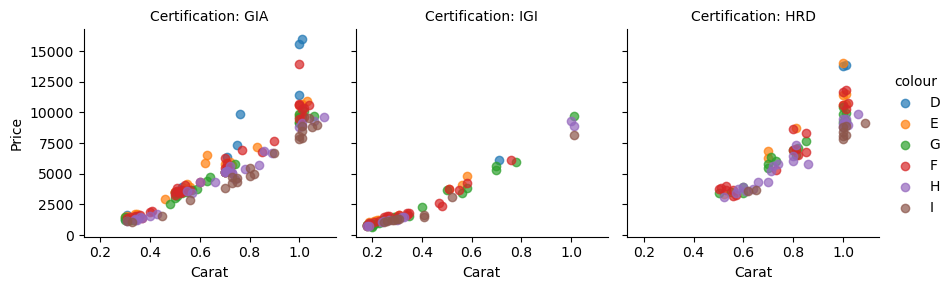

In [7]:
# For even deeper insight, we can combine coloring with small multiples (facets)

g = sns.FacetGrid(df, col='certification', hue='colour', palette='tab10', col_wrap=3)
g.map(plt.scatter, 'carat', 'price', alpha=0.7)
g.add_legend()
g.set_axis_labels('Carat', 'Price')
g.set_titles('Certification: {col_name}')
plt.show()

# Interpretation:
# This plot splits the data by `certification` and colors by `colour`.
# - Within each certification group, higher colour grades (D, E) still trend higher in price.
# - IGI-certified diamonds show less price variation by colour, possibly indicating a different market.

## **8. Summary**

 - Adding **color based on a categorical variable** turns a 2D scatter plot into a **multivariate visualization**.
 - This reveals **subgroup patterns** that are invisible in aggregate plots.
 - Choose **color palettes wisely**:
     - Use **qualitative palettes** (e.g., `tab10`) for nominal variables (`certification`).
     - Use **sequential palettes** (e.g., `viridis`) for ordinal variables (`clarity`, `colour`).
 - Always include a **legend** and **clear axis labels**.